In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
investments = pd.read_csv("investments_VC.csv", encoding = "ISO-8859-1")

In [4]:
investments = investments.iloc[:-4856,:] # Drop all the NAs off the bototm

In [4]:
investments.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [5]:
#investments

In [6]:
# Look at the various classes


op = len(investments[investments['status'] == 'operating'])
ac = len(investments[investments['status'] == 'acquired'])
cl = len(investments[investments['status'] == 'closed'])

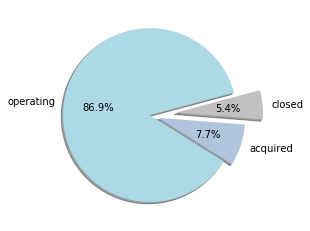

In [7]:
Tasks = [op,ac,cl]

my_labels = 'operating','acquired','closed'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0.3)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)

plt.show()

In [5]:
#Get the levels of the markets
markets = []
for i in investments[' market ']:
    if i not in markets:
        markets.append(i)

marketsize = []
for i in markets:
    marketsize.append(len(investments[investments[' market '] == i]))

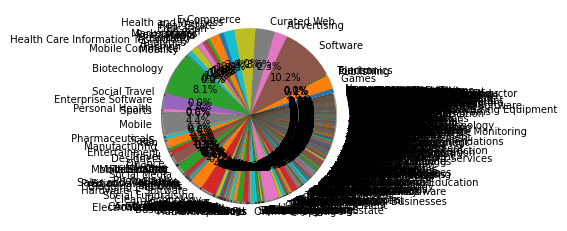

In [6]:
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True) #, colors=my_colors, explode=my_explode)
plt.show()

In [7]:
# Seperate out niche markets
niche_cut_off = 200

In [8]:
smallmarkets = []
for i in range(len(markets)):
     if marketsize[i] < niche_cut_off:
            smallmarkets.append(markets[i])

In [9]:
#Change niche market names to niche markets
for i in range(len(investments[' market '])):
    if investments[' market '][i] in smallmarkets:
        investments[' market '][i] = "Niche Markets"

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# Market sizes for new data
markets = []
for i in investments[' market ']:
    if i not in markets:
        markets.append(i)

marketsize = []
for i in markets:
    marketsize.append(len(investments[investments[' market '] == i]))

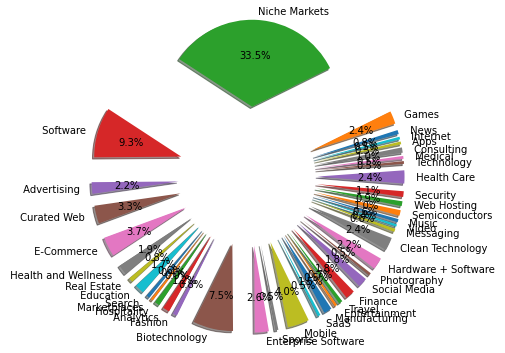

In [11]:
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True, explode = np.ones(len(markets))-.2) 
# 500/np.array(marketsize)     variant for explode
plt.show()

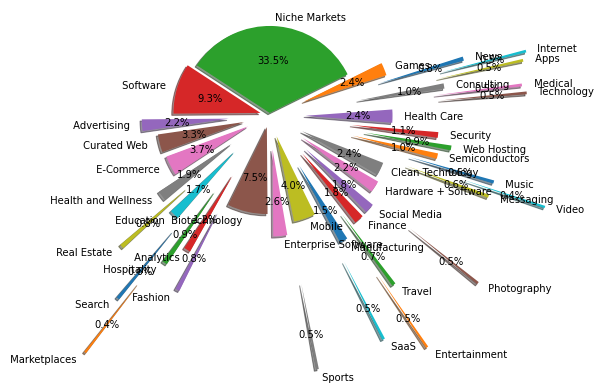

In [12]:
# Variant of same graph
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True, explode =  500/np.array(marketsize)    )
plt.show()

# Data Cleaning

In [13]:
# Grabbing the relevant variables we care about
relevant_investments = investments.iloc[:,4:].copy() # Drop first 4 columns

In [14]:
relevant_investments.sort_values( by = 'founded_month' )

,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
42802,Health and Wellness,"2,00,00,000",operating,NaN,NaN,NaN,NaN,1.0,1902-01-01,1902-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49126,Niche Markets,"2,16,75,000",operating,USA,IL,Chicago,Chicago,2.0,1902-01-01,1902-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39383,Niche Markets,"93,00,000",operating,ISR,NaN,Tel Aviv,Lod,1.0,1903-01-01,1903-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24625,Niche Markets,"6,00,000",operating,USA,CA,Ontario - Inland Empire,Loma Linda,1.0,1905-01-01,1905-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23907,Health and Wellness,"70,00,000",operating,USA,FL,Florida's Treasure Coast,Stuart,1.0,1906-01-01,1906-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,Manufacturing,"90,00,000",NaN,USA,CT,CT - Other,Middlefield,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49422,Niche Markets,-,operating,USA,CA,SF Bay Area,Santa Clara,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49431,E-Commerce,"15,10,500",operating,USA,MA,Boston,Cambridge,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,Beijing,1.0,NaN,NaN,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Drop a few others
relevant_investments = relevant_investments.loc[:, [' market ',
       ' funding_total_usd ', 'status',  'region',
                             'funding_rounds',  'founded_month',
        'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']]

In [16]:
#Dropna
relevant_investments = relevant_investments.dropna()

In [17]:
# Convert Found and fund into months and years
fundall = [i[:7] for i in relevant_investments.first_funding_at]
fundyear = [int(i[:4]) for i in fundall]
fundmonth = [int(i[-2:]) for i in fundall]

foundall = relevant_investments.founded_month.tolist()
foundyear = [int(i[:4]) for i in foundall]
foundmonth = [int(i[-2:]) for i in foundall]

In [18]:
# New variable desc: Time between being founded and funded
relevant_investments['found_to_fund_time'] = (np.array(fundyear) - np.array(foundyear)) * 12 + (np.array(fundmonth) - np.array(foundmonth))

# Training models

In [19]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [20]:
relevant_investments = relevant_investments.loc[:, ['found_to_fund_time', ' market ',
       ' funding_total_usd ', 'status',  'region',
                             'funding_rounds',  'founded_month',
        'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']]

In [21]:
#turn into factor variables
relevant_investments[' market '] = relevant_investments[' market '].astype('category')
relevant_investments['region'] = relevant_investments['region'].astype('category')
relevant_investments['status'] = relevant_investments['status'].astype('category')

In [22]:
relevant_investments[' funding_total_usd '] = relevant_investments[' funding_total_usd '].replace(',','', regex=True)
relevant_investments[' funding_total_usd '] = relevant_investments[' funding_total_usd '].replace(' -   ',np.nan, regex=True)
relevant_investments = relevant_investments.dropna()
relevant_investments[' funding_total_usd '] = [int(i) for i in relevant_investments[' funding_total_usd ']]

In [23]:
relevant_investments

,found_to_fund_time,market,funding_total_usd,status,region,funding_rounds,founded_month,founded_year,first_funding_at,last_funding_at,...,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E
0,0,News,1750000,acquired,New York City,1.0,2012-06,2012.0,2012-06-30,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2,Niche Markets,40000,operating,Tallinn,1.0,2012-10,2012.0,2012-08-09,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Niche Markets,1500000,operating,London,1.0,2011-04,2011.0,2011-04-01,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,Niche Markets,60000,operating,Dallas,2.0,2014-01,2014.0,2014-08-17,2014-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,13,E-Commerce,40000,operating,Santiago,1.0,2012-01,2012.0,2013-02-18,2013-02-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,168,Biotechnology,15419877,closed,MYS - Other,4.0,1994-01,1994.0,2008-01-01,2013-02-15,...,20967.0,0.0,0.0,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0
49432,72,Biotechnology,2686600,operating,Vienna,1.0,2007-01,2007.0,2013-01-29,2013-01-29,...,0.0,0.0,0.0,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0
49433,14,Education,320000,operating,London,1.0,2013-01,2013.0,2014-03-24,2014-03-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,-6,Niche Markets,97398,operating,Split,5.0,2012-05,2012.0,2011-11-01,2014-09-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Scale data
sc = StandardScaler()
normX = relevant_investments.loc[:, ['found_to_fund_time',
       ' funding_total_usd ',  
                             'funding_rounds',  
        'founded_year',
        'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']].copy()
for col in normX.columns:
    normX[[col]] = sc.fit_transform(normX[[col]])

In [61]:
normX

,found_to_fund_time,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E
0,-0.201593,-0.081487,-0.656198,0.650451,1.364167,-0.295260,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
2,-0.210826,-0.090293,-0.656198,0.650451,-0.243838,-0.295260,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
3,-0.201593,-0.082775,-0.656198,0.519143,1.129079,-0.295260,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
4,-0.169279,-0.090190,0.013747,0.913067,-0.281452,-0.295260,0.21086,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
10,-0.141580,-0.090293,-0.656198,0.650451,-0.243838,-0.295260,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,0.573954,-0.011091,1.353635,-1.713091,-0.281452,-0.068499,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069293,-0.022355,-0.014607,-0.013584,-0.017944,1.075746,-0.233472,-0.181124,-0.09148,-0.07834
49432,0.130784,-0.076664,-0.656198,-0.006088,-0.281452,-0.219028,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,0.176590,-0.233472,-0.181124,-0.09148,-0.07834
49433,-0.136964,-0.088851,-0.656198,0.781759,0.019461,-0.295260,-0.03526,-0.045135,-0.017024,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834
49435,-0.229291,-0.089998,2.023580,0.650451,-0.214193,-0.295260,-0.03526,-0.045135,-0.002668,-0.014261,...,-0.069831,-0.022355,-0.014607,-0.013584,-0.017944,-0.278773,-0.233472,-0.181124,-0.09148,-0.07834


In [26]:
Y = relevant_investments['status']

In [145]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(160, 50,30,10), max_iter=1000)

In [146]:
mlp.fit(normX[:int(len(normX)*.6)],Y[:int(len(normX)*.6)])

/Users/jenniferzhang/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(160, 50, 30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [62]:
mlp.score(normX[int(len(normX)*.6):], Y[int(len(normX)*.6):])

0.842498711118749

# Use for Binary ROC curve
## Does not work for multi class

In [33]:
def crossfoldROC(x,y,classifier,k,title):
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(x, y)):
        classifier.fit(x[train], y[train])
        viz = sklearn.metrics.plot_roc_curve(classifier, x[test], y[test],name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for "+ title)
    ax.legend(loc="lower right")
    #ax.get_legend().remove()

    plt.show()

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 5), max_iter=1000)
crossfoldROC(normX,Y.to_numpy(),mlp,5,"Nueral Network")

NameError: name 'crossfoldROC' is not defined

In [34]:
crossfoldROC

<function __main__.crossfoldROC(x, y, classifier, k, title)>

# K Means

In [62]:
# Scale data
sc = StandardScaler()
normX = relevant_investments.loc[:, ['found_to_fund_time',
       ' funding_total_usd ',  
                             'funding_rounds',  
        'founded_year',
        'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']].copy()
for col in normX.columns:
    normX[[col]] = sc.fit_transform(normX[[col]])

In [42]:
Y.value_counts()

operating    25097
acquired      2520
closed        1478
Name: status, dtype: int64

In [43]:
category = []
for i in Y:
    if i == 'operating':
        cat = 0
    if i == 'acquired':
        cat = 1
    if i == 'closed':
        cat = 2
    category = np.append(category, cat)
category = category.astype(int)

In [44]:
df = normX

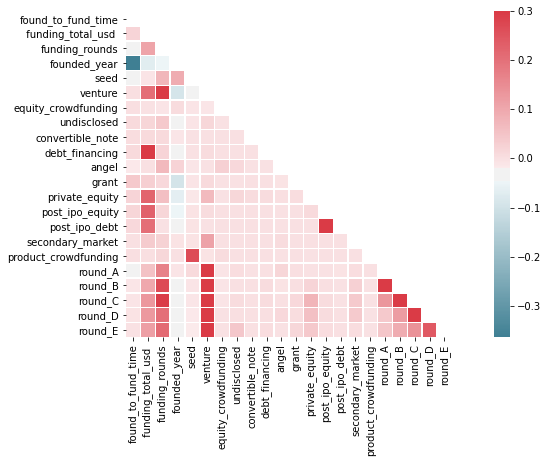

In [45]:
d_corr=df.corr()
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr,mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=.5)
plt.show()

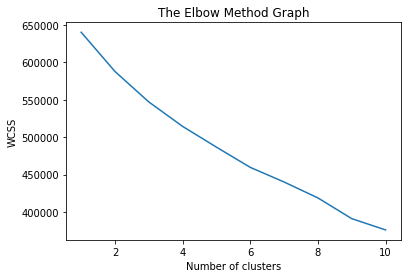

In [46]:
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# elbow method is not helpful, proceed with 3 clusters

In [47]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

df['Cluster']=y_kmeans
print(df['Cluster'].value_counts())
df['category']=category
print(df['category'].value_counts())

0    27781
2     1313
1        1
Name: Cluster, dtype: int64
0    25097
1     2520
2     1478
Name: category, dtype: int64


In [48]:
np.mean(df['Cluster']==df['category'])

0.8254682935212235

In [49]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

confusion_matrix(df['category'], df['Cluster'])
                 #, labels=["operating", "acquired", "closed"])
results = confusion_matrix(df['category'], df['Cluster']) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(df['category'], df['Cluster'])) 
print ('Report :')
print (classification_report(df['category'], df['Cluster']))

Confusion Matrix :
[[23990     1  1106]
 [ 2340     0   180]
 [ 1451     0    27]]
Accuracy Score : 0.8254682935212235
Report :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     25097
           1       0.00      0.00      0.00      2520
           2       0.02      0.02      0.02      1478

    accuracy                           0.83     29095
   macro avg       0.29      0.32      0.31     29095
weighted avg       0.75      0.83      0.78     29095



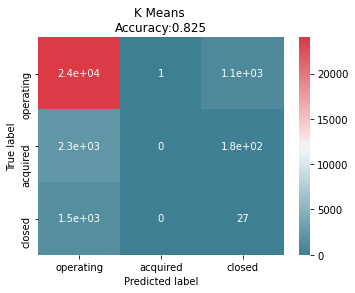

In [50]:
cm_df = pd.DataFrame(results,
                     index = ['operating','acquired','closed'], 
                     columns = ['operating','acquired','closed'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap=cmap, annot=True)
plt.title('K Means \nAccuracy:{0:.3f}'.format(accuracy_score(df['category'], df['Cluster'])))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normX, category, test_size = 0.25, random_state = 0)

In [65]:
### RandomForest feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(max_features=10))
sel.fit(normX, category)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)


Index(['found_to_fund_time', ' funding_total_usd ', 'funding_rounds',
       'founded_year', 'seed', 'venture', 'round_A'],
      dtype='object')


In [66]:
normX2 = normX[['found_to_fund_time', ' funding_total_usd ', 'funding_rounds', 'founded_year', 'seed', 'venture',
               'round_A']]

In [67]:
df2 = normX2.copy()

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df2)
y_kmeans

df2['Cluster']=y_kmeans
print(df2['Cluster'].value_counts())
df2['category']=category
print(df2['category'].value_counts())

0    25298
2     3795
1        2
Name: Cluster, dtype: int64
0    25097
1     2520
2     1478
Name: category, dtype: int64


In [68]:
confusion_matrix(df2['category'], df2['Cluster'])
                 #, labels=["operating", "acquired", "closed"])
results = confusion_matrix(df2['category'], df2['Cluster']) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(df2['category'], df2['Cluster'])) 
print ('Report :')
print (classification_report(df2['category'], df2['Cluster']))

Confusion Matrix :
[[21893     1  3203]
 [ 2018     1   501]
 [ 1387     0    91]]
Accuracy Score : 0.7556281147963567
Report :
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     25097
           1       0.50      0.00      0.00      2520
           2       0.02      0.06      0.03      1478

    accuracy                           0.76     29095
   macro avg       0.46      0.31      0.30     29095
weighted avg       0.79      0.76      0.75     29095



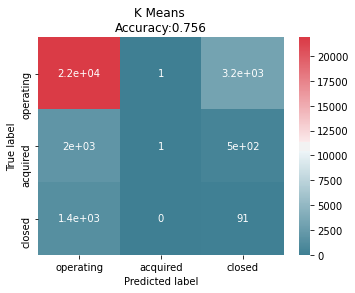

In [69]:
cm_df = pd.DataFrame(results,
                     index = ['operating','acquired','closed'], 
                     columns = ['operating','acquired','closed'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap=cmap, annot=True)
plt.title('K Means \nAccuracy:{0:.3f}'.format(accuracy_score(df2['category'], df2['Cluster'])))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### SMOTE

In [326]:
from kmeans_smote import KMeansSMOTE

[print('Class {} has {} instances'.format(label, count))
 for label, count in zip(*np.unique(category, return_counts=True))]

kmeans_smote = KMeansSMOTE(
    kmeans_args={
        'n_clusters': 3
    },
    smote_args={
        'k_neighbors': 10
    }
)
X_resampled, y_resampled = kmeans_smote.fit_sample(normX, category)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

Class 0 has 25097 instances
Class 1 has 2520 instances
Class 2 has 1478 instances


/Users/jenniferzhang/anaconda3/lib/python3.7/site-packages/kmeans_smote.py:322: UserWarning: No minority clusters found for class 1. Performing regular SMOTE. Try changing the number of clusters.
  warnings.warn('No minority clusters found for class {}. Performing regular SMOTE. Try changing the number of clusters.'.format(minority_class_label))
/Users/jenniferzhang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  def _update_doc(self, olddoc):
/Users/jenniferzhang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  def _update_doc(self, olddoc):
/Users/jenniferzhang/anaconda3/lib/python3.7/site-packages/kmeans_smote.py:322: UserWarning: No minority clusters found for class 2. P

Class 0 has 25097 instances after oversampling
Class 1 has 47674 instances after oversampling
Class 2 has 48716 instances after oversampling


[None, None, None]

In [333]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X_resampled)
y_kmeans

df3=pd.DataFrame(X_resampled)
df3['Cluster']=y_kmeans
print(df3['Cluster'].value_counts())
df3['category']=y_resampled
print(df3['category'].value_counts())

0    108922
2     12549
1        16
Name: Cluster, dtype: int64
2    48716
1    47674
0    25097
Name: category, dtype: int64


In [334]:
confusion_matrix(df3['category'], df3['Cluster'])
                 #, labels=["operating", "acquired", "closed"])
results = confusion_matrix(df3['category'], df3['Cluster']) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(df3['category'], df3['Cluster'])) 
print ('Report :')
print (classification_report(df3['category'], df3['Cluster']))

Confusion Matrix :
[[22672     1  2424]
 [39736    15  7923]
 [46514     0  2202]]
Accuracy Score : 0.20486965683571082
Report :
              precision    recall  f1-score   support

           0       0.21      0.90      0.34     25097
           1       0.94      0.00      0.00     47674
           2       0.18      0.05      0.07     48716

    accuracy                           0.20    121487
   macro avg       0.44      0.32      0.14    121487
weighted avg       0.48      0.20      0.10    121487



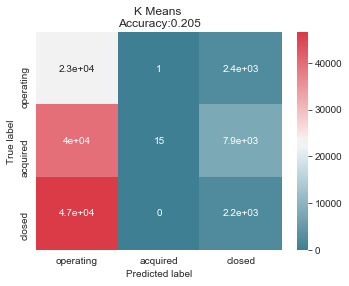

In [335]:
cm_df = pd.DataFrame(results,
                     index = ['operating','acquired','closed'], 
                     columns = ['operating','acquired','closed'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap=cmap, annot=True)
plt.title('K Means \nAccuracy:{0:.3f}'.format(accuracy_score(df3['category'], df3['Cluster'])))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()